In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import PIL.Image
import pandas as pd
import time
from datetime import timedelta
import math
import dataset
import random
import os
import cache

In [2]:
import vgg16
from vgg16 import transfer_values_cache
from vgg16 import transfer_values_calc

In [3]:
vgg16.maybe_download()
model=vgg16.VGG16()

Data has apparently already been downloaded and unpacked.


In [4]:
classes=['0','1','2','3','4','5','6','7','8','9','A','A_LOW','B','B_LOW','C','C_LOW','D','D_LOW','E','E_LOW','F','F_LOW','G',
         'G_LOW','H','H_LOW','I','I_LOW','J','J_LOW','K','K_LOW','L','L_LOW','M','M_LOW','N','N_LOW','O','O_LOW','P','P_LOW','Q',
         'Q_LOW','R','R_LOW','S','S_LOW','T','T_LOW','U','U_LOW','V','V_LOW','W','W_LOW','X','X_LOW','Y','Y_LOW','Z','Z_LOW']
class_numbers=list(range(62))
num_classes=len(classes)
num_channels=3
validation_size = .2
img_size = 128
#custom paths
train_path = 'C:/Users/Konstantin/Machine Learning/NIST Handwritten project/NIST/train'
test_path = 'C:/Users/Konstantin/Machine Learning/NIST Handwritten project/NIST/test'
cache_path= 'C:/Users/Konstantin/Machine Learning/NIST Handwritten project/cache_NIST'

In [5]:
#first time loading
train_data = dataset.read_train_sets(train_path, img_size, classes, validation_size=validation_size)
test_data = dataset.read_test_set(test_path, img_size,classes)

Reading training images
Loading 0 files (Index: 0)
Loading 1 files (Index: 1)
Loading 2 files (Index: 2)
Loading 3 files (Index: 3)
Loading 4 files (Index: 4)
Loading 5 files (Index: 5)
Loading 6 files (Index: 6)
Loading 7 files (Index: 7)
Loading 8 files (Index: 8)
Loading 9 files (Index: 9)
Loading A files (Index: 10)
Loading A_LOW files (Index: 11)
Loading B files (Index: 12)
Loading B_LOW files (Index: 13)
Loading C files (Index: 14)
Loading C_LOW files (Index: 15)
Loading D files (Index: 16)
Loading D_LOW files (Index: 17)
Loading E files (Index: 18)
Loading E_LOW files (Index: 19)
Loading F files (Index: 20)
Loading F_LOW files (Index: 21)
Loading G files (Index: 22)
Loading G_LOW files (Index: 23)
Loading H files (Index: 24)
Loading H_LOW files (Index: 25)
Loading I files (Index: 26)
Loading I_LOW files (Index: 27)
Loading J files (Index: 28)
Loading J_LOW files (Index: 29)
Loading K files (Index: 30)
Loading K_LOW files (Index: 31)
Loading L files (Index: 32)
Loading L_LOW file

In [6]:
from cache import cache_nof
#custom cache paths
images_train_data_path = os.path.join(cache_path, 'images_train.pkl')
cls_train_data_path=os.path.join(cache_path, 'cls_train.pkl')
labels_train_data_path=os.path.join(cache_path, 'labels_train.pkl')
ids_train_data_path=os.path.join(cache_path, 'ids_train.pkl')
images_valid_data_path=os.path.join(cache_path, 'images_valid.pkl')
cls_valid_data_path=os.path.join(cache_path, 'cls_valid.pkl')
labels_valid_data_path=os.path.join(cache_path, 'labels_valid.pkl')
ids_valid_data_path=os.path.join(cache_path, 'ids_valid.pkl')
images_test_data_path=os.path.join(cache_path, 'images_test.pkl')
cls_test_data_path=os.path.join(cache_path, 'cls_test.pkl')
ids_test_data_path=os.path.join(cache_path, 'ids_test.pkl')
labels_test_data_path=os.path.join(cache_path, 'labels_test.pkl')

images_train=cache_nof(images_train_data_path,train_data.train.images)
cls_train=cache_nof(cls_train_data_path,train_data.train.cls)
labels_train=cache_nof(labels_train_data_path,train_data.train.labels)
ids_train=cache_nof(ids_train_data_path,train_data.train.ids)
images_valid=cache_nof(images_valid_data_path,train_data.valid.images)
cls_valid=cache_nof(cls_valid_data_path,train_data.valid.cls)
labels_valid=cache_nof(labels_valid_data_path,train_data.valid.labels)
ids_valid=cache_nof(ids_valid_data_path,train_data.valid.ids)
images_test=cache_nof(images_test_data_path,test_data.test.images)
cls_test=cache_nof(cls_test_data_path,test_data.test.cls)
labels_test=cache_nof(labels_test_data_path,test_data.test.labels)
ids_test=cache_nof(ids_test_data_path,test_data.test.ids)

- Data loaded from cache-file: C:/Users/Konstantin/Machine Learning/NIST Handwritten project/cache_NIST\images_train.pkl
- Data loaded from cache-file: C:/Users/Konstantin/Machine Learning/NIST Handwritten project/cache_NIST\cls_train.pkl
- Data loaded from cache-file: C:/Users/Konstantin/Machine Learning/NIST Handwritten project/cache_NIST\labels_train.pkl
- Data loaded from cache-file: C:/Users/Konstantin/Machine Learning/NIST Handwritten project/cache_NIST\ids_train.pkl
- Data loaded from cache-file: C:/Users/Konstantin/Machine Learning/NIST Handwritten project/cache_NIST\images_valid.pkl
- Data loaded from cache-file: C:/Users/Konstantin/Machine Learning/NIST Handwritten project/cache_NIST\cls_valid.pkl
- Data loaded from cache-file: C:/Users/Konstantin/Machine Learning/NIST Handwritten project/cache_NIST\labels_valid.pkl
- Data loaded from cache-file: C:/Users/Konstantin/Machine Learning/NIST Handwritten project/cache_NIST\ids_valid.pkl
- Data loaded from cache-file: C:/Users/Kons

In [7]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(train_data.train.labels)))
print("- Test-set:\t\t{}".format(len(test_data.test.labels)))
print("- Validation-set:\t{}".format(len(train_data.valid.labels)))
def plot_images(images, cls_true, cls_pred=None):
    
    if len(images) == 0:
        print("no images to show")
        return 
    else:
        random_indices = random.sample(range(len(images)), min(len(images), 9))
        
        
    images, cls_true  = zip(*[(images[i], cls_true[i]) for i in random_indices])
    
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):

        ax.imshow(images[i].reshape(img_size, img_size, num_channels))


        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()

Size of:
- Training-set:		80000
- Test-set:		31000
- Validation-set:	20000


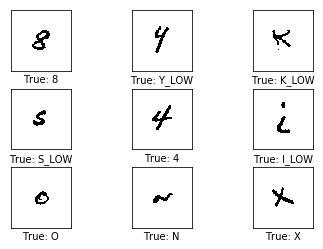

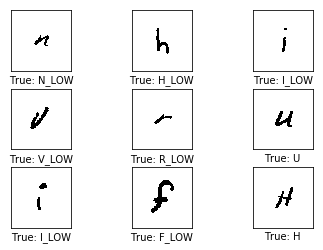

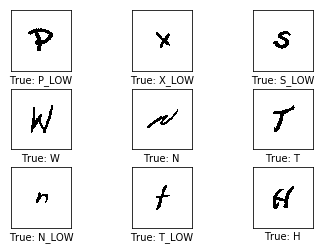

In [8]:
plot_images(images=images_train, cls_true=cls_train)
plot_images(images=images_valid, cls_true=cls_valid)
plot_images(images=images_test, cls_true=cls_test)

In [9]:
file_path_cache_train = os.path.join(cache_path, 'vgg16_train_full_pool5.pkl')
file_path_cache_test = os.path.join(cache_path, 'vgg16_test_full_pool5.pkl')
file_path_cache_valid = os.path.join(cache_path, 'vgg16_valid_full_pool5.pkl')

In [10]:
print("Processing VGG 16 transfer-values for training-images ...")

transfer_values_train = transfer_values_cache(cache_path=file_path_cache_train,
                                              images=images_train,
                                              model=model)

Processing VGG 16 transfer-values for training-images ...
- Data loaded from cache-file: C:/Users/Konstantin/Machine Learning/NIST Handwritten project/cache_NIST\vgg16_train_full_pool5.pkl


In [11]:
print("Processing VGG 16 transfer-values for test-images ...")

transfer_values_test = transfer_values_cache(cache_path=file_path_cache_test,
                                             images=images_test,
                                             model=model)

Processing VGG 16 transfer-values for test-images ...
- Data loaded from cache-file: C:/Users/Konstantin/Machine Learning/NIST Handwritten project/cache_NIST\vgg16_test_full_pool5.pkl


In [12]:
print("Processing VGG 16 transfer-values for validation-images ...")

transfer_values_valid = transfer_values_cache(cache_path=file_path_cache_valid,
                                             images=images_valid,
                                             model=model)

Processing VGG 16 transfer-values for validation-images ...
- Data loaded from cache-file: C:/Users/Konstantin/Machine Learning/NIST Handwritten project/cache_NIST\vgg16_valid_full_pool5.pkl


In [13]:
transfer_values_train_r=transfer_values_train.reshape(len(train_data.train.labels),8192)
transfer_values_test_r=transfer_values_test.reshape(len(test_data.test.labels),8192)
transfer_values_valid_r=transfer_values_valid.reshape(len(train_data.valid.labels),8192)

In [14]:
transfer_len=8192
cls_test = np.array([label.argmax() for label in labels_test])
cls_valid = np.array([label.argmax() for label in labels_valid])
fc_size=2048

In [15]:
def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))
def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))
def new_fc_layer(input,          # The previous layer.
                 num_inputs,     # Num. inputs from prev. layer.
                 num_outputs,
                 keep_prob,# Num. outputs.
                 use_relu=True,
                use_dropout=True,
                ): # Use Rectified Linear Unit (ReLU)?

    # Create new weights and biases.
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)

    # Calculate the layer as the matrix multiplication of
    # the input and weights, and then add the bias-values.
    layer = tf.matmul(input, weights) + biases

    # Use ReLU?
    if use_relu:
        layer = tf.nn.relu(layer)
    if use_dropout:
        layer = tf.nn.dropout(layer,keep_prob)
    return layer

In [44]:
x = tf.placeholder(tf.float32, shape=[None, transfer_len], name='x')
y_true = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true')
y_true_cls = tf.argmax(y_true, dimension=1)
keep_prob=0.7


In [45]:
layer_fc1 = new_fc_layer(input=x,
                         num_inputs=transfer_len,
                         num_outputs=fc_size,
                         keep_prob=keep_prob,
                         use_relu=True,
                        use_dropout=False)

In [46]:
layer_fc2 = new_fc_layer(input=layer_fc1,
                         num_inputs=fc_size,
                         num_outputs=fc_size,
                         keep_prob=keep_prob,
                         use_relu=True,
                        use_dropout=False)

In [47]:
layer_fc3 = new_fc_layer(input=layer_fc2,
                         num_inputs=fc_size,
                         num_outputs=num_classes,
                         keep_prob=keep_prob,
                         use_relu=False,use_dropout=False)

In [48]:
layer_fc1.shape

TensorShape([Dimension(None), Dimension(2048)])

In [49]:
layer_fc2.shape

TensorShape([Dimension(None), Dimension(2048)])

In [50]:
layer_fc3.shape

TensorShape([Dimension(None), Dimension(62)])

In [51]:
y_pred = tf.nn.softmax(layer_fc3)
y_pred_cls = tf.argmax(y_pred, dimension=1)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc3,
                                                        labels=y_true)
cost = tf.reduce_mean(cross_entropy)
global_step = tf.Variable(initial_value=0,
                          name='global_step', trainable=False)

optimizer = tf.train.AdamOptimizer(learning_rate=7e-4).minimize(cost, global_step)
y_pred_cls = tf.argmax(y_pred, dimension=1)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [52]:
session = tf.Session()
session.run(tf.global_variables_initializer())

In [53]:
train_batch_size = 1000
valid_batch_size = 1000

In [54]:
saver = tf.train.Saver()

In [55]:
save_dir = 'checkpoints/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
save_path = os.path.join(save_dir, 'best_training')
# Best validation accuracy seen so far.
best_training_accuracy = 0.0

In [56]:
def random_batch():
    # Number of images (transfer-values) in the training-set.
    num_images = len(transfer_values_train_r)

    # Create a random index.
    idx = np.random.choice(num_images,
                           size=train_batch_size,
                           replace=False)

    # Use the random index to select random x and y-values.
    # We use the transfer-values instead of images as x-values.
    x_batch = transfer_values_train_r[idx]
    y_batch = labels_train[idx]

    return x_batch, y_batch
def random_batch_valid():
    # Number of images (transfer-values) in the training-set.
    num_images = len(transfer_values_valid_r)

    # Create a random index.
    idx = np.random.choice(num_images,
                           size=valid_batch_size,
                           replace=False)

    # Use the random index to select random x and y-values.
    # We use the transfer-values instead of images as x-values.
    x_batch = transfer_values_valid_r[idx]
    y_batch = labels_valid[idx]

    return x_batch, y_batch

In [2]:
def optimize(num_iterations):
    # Start-time used for printing time-usage below.
    start_time = time.time()
    global best_training_accuracy
    for i in range(num_iterations):
        # Get a batch of training examples.
        # x_batch now holds a batch of images (transfer-values) and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = random_batch()
        x_batch_valid,y_true_batch_valid=random_batch_valid()
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}
        feed_dict_valid = {x: x_batch_valid,
                           y_true: y_true_batch_valid}
        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        # We also want to retrieve the global_step counter.
        i_global, _ = session.run([global_step, optimizer],
                                  feed_dict=feed_dict_train)
        i_global, _ = session.run([global_step, optimizer],
                                  feed_dict=feed_dict_valid)
        # Print status to screen every 100 iterations (and last).
        if (i_global % 100 == 0) or (i == num_iterations - 1):
            # Calculate the accuracy on the training-batch.
            batch_acc = session.run(accuracy,
                                    feed_dict=feed_dict_train)
            batch_acc_val = session.run(accuracy,
                                    feed_dict=feed_dict_valid)
            if batch_acc >= best_training_accuracy:
                
                best_training_accuracy = batch_acc

                
                saver.save(sess=session, save_path=save_path)

                
                improved_str = '*'
            else:
                
                improved_str = ''
            # Print status.
            msg = "Global Step: {0:>6}, Training Batch Accuracy: {1:>6.1%} {2}"
            print(msg.format(i_global, batch_acc,improved_str))
            msg = "Validation Batch Accuracy: {1:>6.1%}"
            print(msg.format(i_global, batch_acc_val))
            print_accuracy_test()

    # Ending time.
    end_time = time.time()

    # Difference between start and end-times.
    time_dif = end_time - start_time

    # Print the time-usage.
    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))

In [80]:
def plot_example_errors(cls_pred, correct):
    # This function is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # correct is a boolean array whether the predicted class
    # is equal to the true class for each image in the test-set.

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = images_test[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = cls_test[incorrect]

    n = min(9, len(images))
    
    # Plot the first n images.
    plot_images(images=images[0:n],
                cls_true=cls_true[0:n],
                cls_pred=cls_pred[0:n])

In [81]:
# Import a function from sklearn to calculate the confusion-matrix.
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cls_pred):
    # This is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_test,  # True class for test-set.
                          y_pred=cls_pred)  # Predicted class.

    # Print the confusion matrix as text.
    for i in range(num_classes):
        # Append the class-name to each line.
        class_name = "({}) {}".format(i, classes[i])
        print(cm[i, :], class_name)

    # Print the class-numbers for easy reference.
    class_numbers = [" ({0})".format(i) for i in range(num_classes)]
    print("".join(class_numbers))

In [82]:
feed_dict_test = {x: transfer_values_test_r,
                  y_true: labels_test}
feed_dict_train = {x: transfer_values_train_r,
                  y_true: labels_train}
feed_dict_valid = {x: transfer_values_valid_r,
                  y_true: labels_valid}

In [83]:
def print_accuracy_test():
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    print("Accuracy on test-set: {0:.1%}".format(acc))
def print_accuracy_valid():
    acc_valid=session.run(accuracy, feed_dict=feed_dict_valid)
    print("Accuracy on validation-set: {0:.1%}".format(acc_valid))

In [84]:
print_accuracy_test()

Accuracy on test-set: 1.6%


(80000, 4, 4, 512)

In [86]:
optimize(num_iterations=1)

Global Step:      2, Training Batch Accuracy:   8.9% *
Validation Batch Accuracy:   8.1%
Accuracy on test-set: 6.6%
Time usage: 0:00:05


In [1]:
optimize(num_iterations=1000)

NameError: name 'optimize' is not defined

In [37]:
optimize(num_iterations=1000)

Global Step:   1100, Training Batch Accuracy:  98.2% *
Validation Batch Accuracy:  76.2%
Accuracy on test-set: 91.2%
Global Step:   1200, Training Batch Accuracy:  96.9% 
Validation Batch Accuracy:  76.0%
Accuracy on test-set: 90.7%
Global Step:   1300, Training Batch Accuracy:  98.3% *
Validation Batch Accuracy:  76.7%
Accuracy on test-set: 91.7%
Global Step:   1400, Training Batch Accuracy:  97.7% 
Validation Batch Accuracy:  77.1%
Accuracy on test-set: 91.9%
Global Step:   1500, Training Batch Accuracy:  97.9% 
Validation Batch Accuracy:  76.6%
Accuracy on test-set: 91.2%
Global Step:   1600, Training Batch Accuracy:  98.0% 
Validation Batch Accuracy:  77.2%
Accuracy on test-set: 91.7%
Global Step:   1700, Training Batch Accuracy:  98.6% *
Validation Batch Accuracy:  77.4%
Accuracy on test-set: 92.1%
Global Step:   1800, Training Batch Accuracy:  97.7% 
Validation Batch Accuracy:  77.5%
Accuracy on test-set: 91.6%
Global Step:   1900, Training Batch Accuracy:  97.7% 
Validation Batc

In [38]:
optimize(num_iterations=10000)

Global Step:   2100, Training Batch Accuracy:  98.4% 
Validation Batch Accuracy:  77.5%
Accuracy on test-set: 91.9%
Global Step:   2200, Training Batch Accuracy:  98.0% 
Validation Batch Accuracy:  77.4%
Accuracy on test-set: 91.2%
Global Step:   2300, Training Batch Accuracy:  98.8% *
Validation Batch Accuracy:  77.9%
Accuracy on test-set: 91.6%
Global Step:   2400, Training Batch Accuracy:  97.8% 
Validation Batch Accuracy:  77.6%
Accuracy on test-set: 91.2%
Global Step:   2500, Training Batch Accuracy:  97.9% 
Validation Batch Accuracy:  78.0%
Accuracy on test-set: 92.2%
Global Step:   2600, Training Batch Accuracy:  97.7% 
Validation Batch Accuracy:  78.1%
Accuracy on test-set: 91.6%
Global Step:   2700, Training Batch Accuracy:  98.3% 
Validation Batch Accuracy:  78.2%
Accuracy on test-set: 92.0%
Global Step:   2800, Training Batch Accuracy:  98.3% 
Validation Batch Accuracy:  78.3%
Accuracy on test-set: 92.0%
Global Step:   2900, Training Batch Accuracy:  98.9% *
Validation Batch

KeyboardInterrupt: 

In [39]:
print_accuracy_valid()

Accuracy on validation-set: 78.5%


In [ ]:
optimize(num_iterations=1000)

In [ ]:
cls_pred=session.run(y_pred_cls,feed_dict=feed_dict_test)

In [ ]:
plot_confusion_matrix(cls_pred)

# Restore

In [34]:
saver.restore(sess=session, save_path=save_path)

INFO:tensorflow:Restoring parameters from checkpoints/best_training


In [44]:
optimize(num_iterations=1)

Global Step:   1004, Training Batch Accuracy:  93.1% *
Validation Batch Accuracy:  78.7%
Accuracy on test-set: 88.4%
Time usage: 0:00:05
